In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
trainFolder = "data/train"
validFolder = "data/valid"
testFolder = "data/test"

In [3]:
trainSet = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,channel_shift_range=10,horizontal_flip=True).flow_from_directory(trainFolder, target_size=(224, 224), classes=["cola", "crisp"], batch_size=10)
validSet = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,channel_shift_range=10,horizontal_flip=True).flow_from_directory(validFolder, target_size=(224, 224), classes=["cola", "crisp"], batch_size=4)
testSet = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,channel_shift_range=10,horizontal_flip=True).flow_from_directory(testFolder, target_size=(224, 224), classes=["cola", "crisp"], batch_size=10)

Found 559 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        plt.show()

In [5]:
imgs, labels = next(trainSet)

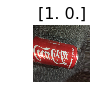

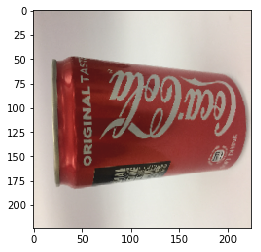

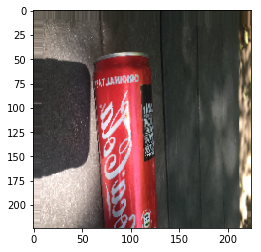

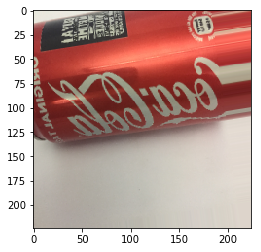

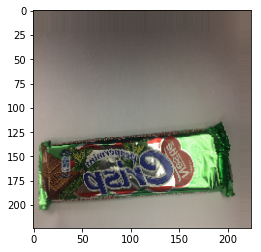

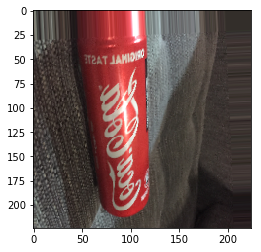

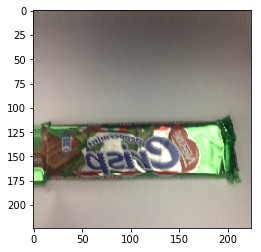

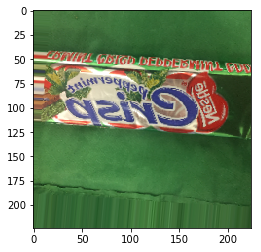

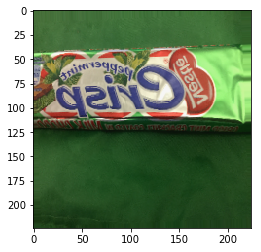

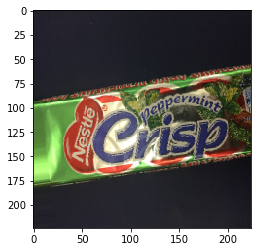

In [6]:
plots(imgs, titles=labels)

In [7]:
v_model=keras.applications.vgg16.VGG16()

In [8]:
model=Sequential()
for layer in v_model.layers[:-1]:
    model.add(layer)

In [9]:
for layer in model.layers:
    layer.trainable=False

In [10]:
model.add(Dense(2,activation="softmax"))

In [11]:
model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"]) 

In [13]:
model.fit_generator(trainSet, steps_per_epoch=40, validation_data=validSet, validation_steps=4, epochs=4, verbose=2)

Epoch 1/4
 - 261s - loss: 4.5509e-04 - acc: 1.0000 - val_loss: 0.3331 - val_acc: 0.8750
Epoch 2/4
 - 249s - loss: 4.3878e-04 - acc: 1.0000 - val_loss: 0.0555 - val_acc: 1.0000
Epoch 3/4
 - 254s - loss: 2.0083e-04 - acc: 1.0000 - val_loss: 0.4825 - val_acc: 0.8125
Epoch 4/4
 - 275s - loss: 7.3102e-04 - acc: 1.0000 - val_loss: 0.1069 - val_acc: 0.9375


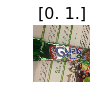

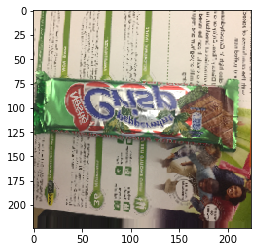

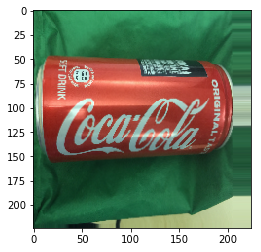

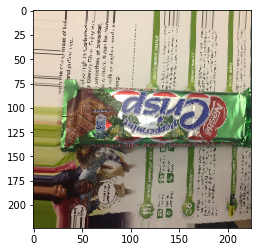

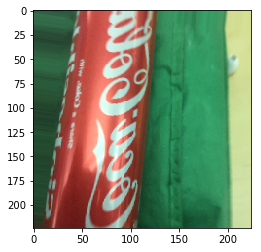

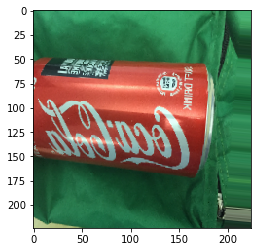

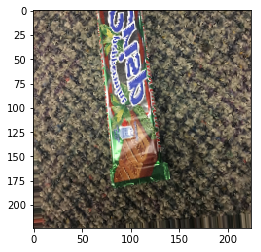

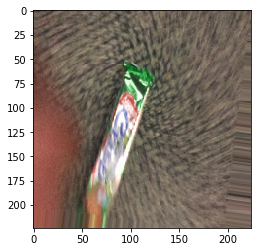

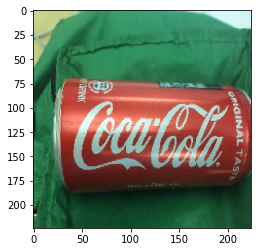

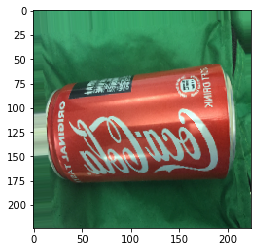

In [14]:
test_imgs,test_labels=next(testSet)
plots(test_imgs,titles=test_labels)
test_labels=test_labels[:,0]

In [15]:
predict=model.predict_generator(testSet,steps=1,verbose=0)

In [16]:
cm=confusion_matrix(test_labels,np.round(predict[:,0]))

In [18]:
cm

array([[3, 2],
       [0, 5]])

In [35]:
print("true positive(True:Cola Predict:Cola)\t"+str(cm[0][0])+"\tFasle Positive(true:cola predict:crisp)\t"+str(cm[0][1])+"\n")
print("false neg(True:Crisp Predict:Cola)\t"+str(cm[1][0])+"\tTrue neg(True:Crisp Predict:Crisp)\t"+str(cm[1][1])+"\n")
print("Accuracy:"+str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))




true positive(True:Cola Predict:Cola)	3	Fasle Positive(true:cola predict:crisp)	2

false neg(True:Crisp Predict:Cola)	0	True neg(True:Crisp Predict:Crisp)	5

Accuracy:0.8
